# Análise para departamento de RH
Objetivo: identificar funcionários mais propensos a sair da empresa

## Importação de bibliotecas e carga de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import models, layers, optimizers
import pickle

#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

2022-06-06 10:15:54.120660: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-06 10:15:54.120695: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
employee_df = pd.read_csv("./Human_Resources.csv")
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Análise dos dados

In [3]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == "Yes" else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == "Yes" else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == "Y" else 0)
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


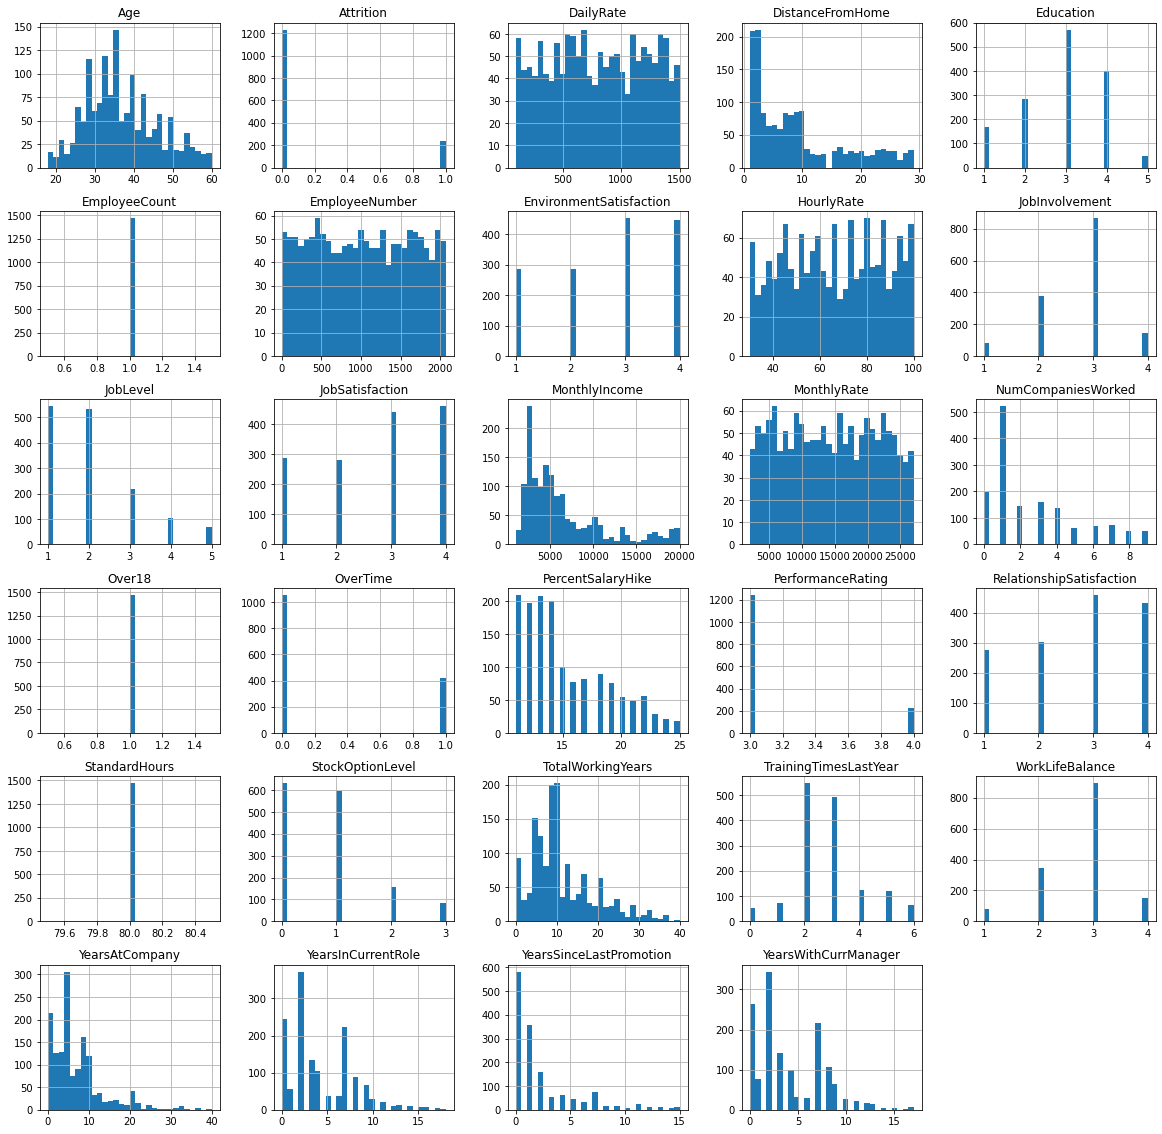

In [6]:
employee_df.hist(bins=30, figsize=(20, 20));

In [7]:
employee_df.drop(columns=["Over18", "StandardHours", "EmployeeCount", "EmployeeNumber"], inplace=True)
employee_df.shape

(1470, 31)

In [8]:
left_df = employee_df.query("Attrition == 1")
stayed_df = employee_df.query("Attrition == 0")

In [9]:
print("Qtd left:", len(left_df))
print("% left:", (len(left_df)/len(employee_df))*100)
print("Qtd stayed:", len(stayed_df))
print("% stayed:", (len(stayed_df)/len(employee_df))*100)

Qtd left: 237
% left: 16.122448979591837
Qtd stayed: 1233
% stayed: 83.87755102040816


Comparação de perfil de quem sai da empresa e de quem fica

In [10]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [11]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


Logo de inicio, é possível perceber que essa empresa, tende a seguir um padrão de que pessoas mais jovens tendem a sair (talvez pelo adquirir experiências variadas) e quem é mais velho, tende a ficar (talvez precisando de uma estabilidade por conta de uma família). O salário de quem fica é maior e a distância até a residência é menor  

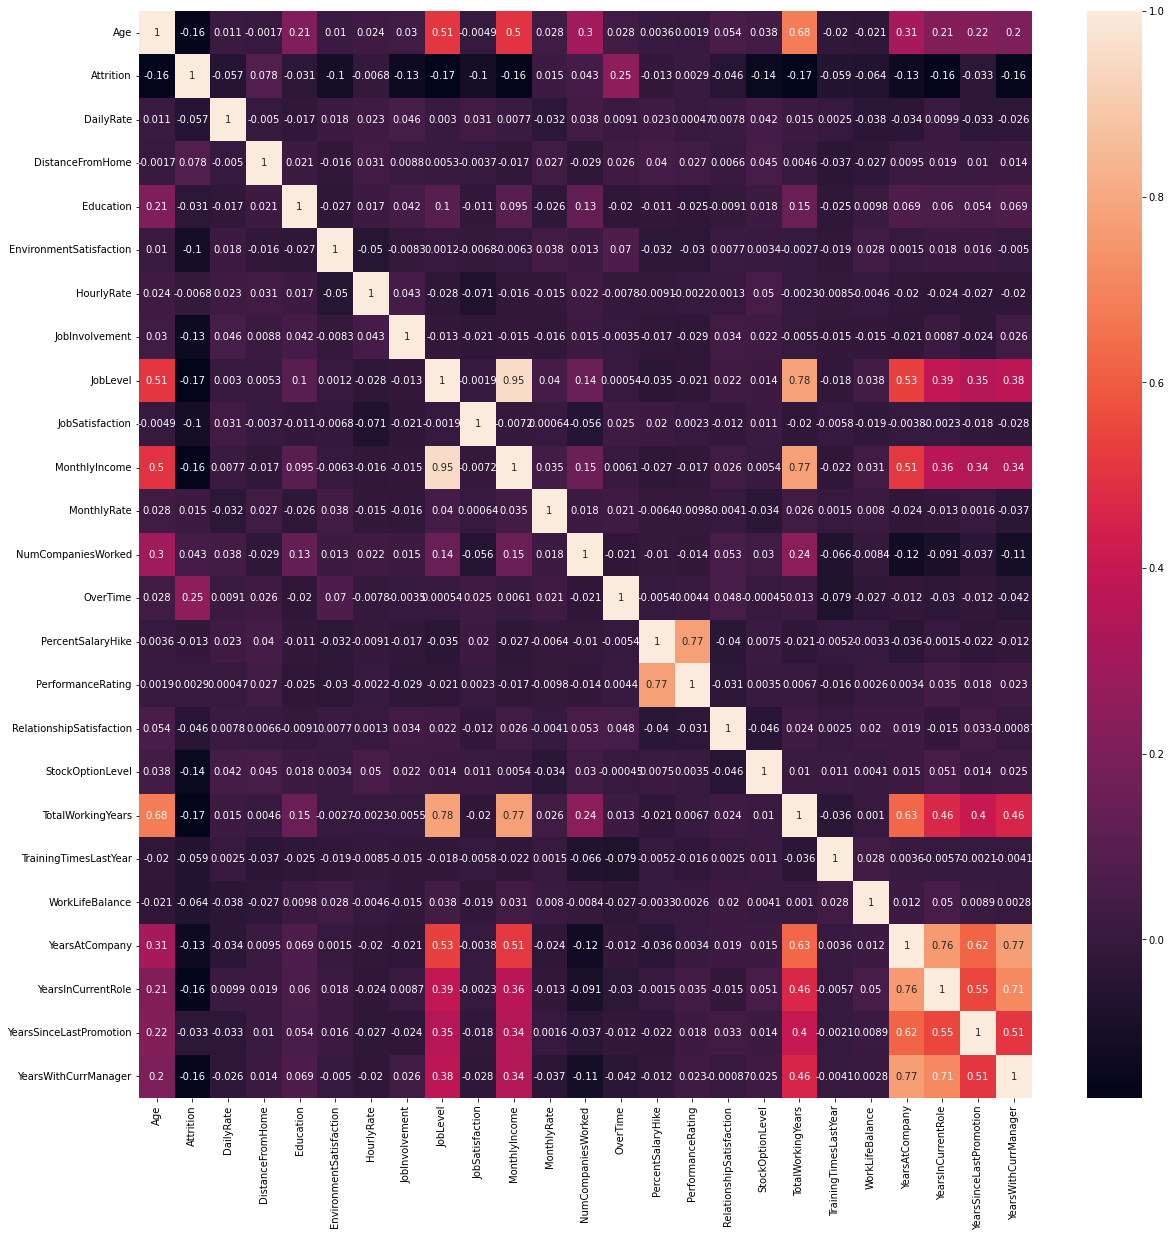

In [12]:
corr = employee_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True);

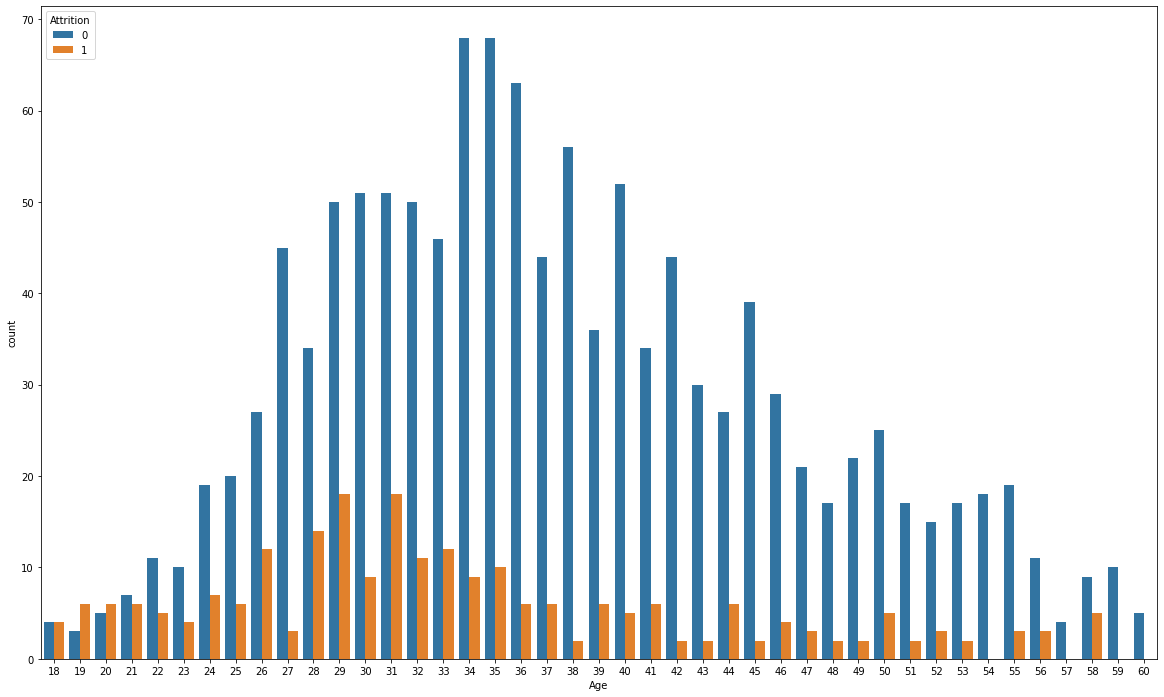

In [13]:
plt.figure(figsize=(20, 12))
sns.countplot(x="Age", hue="Attrition", data=employee_df);

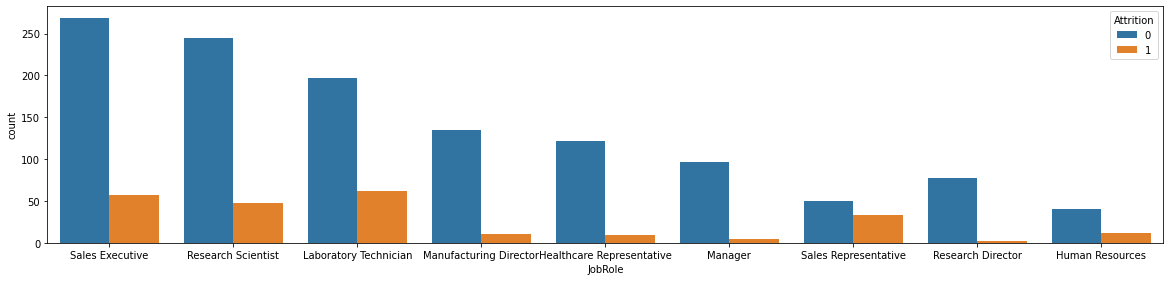

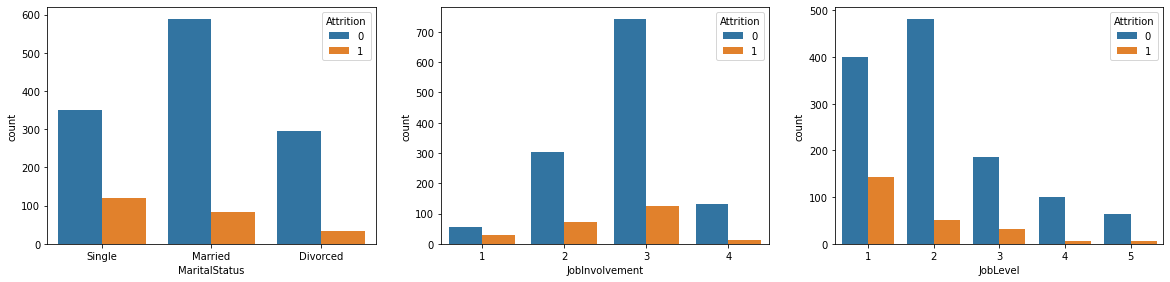

In [14]:
plt.figure(figsize=(20, 20))
plt.subplot(4, 1, 1)
sns.countplot(x="JobRole", hue="Attrition", data=employee_df)
plt.figure(figsize=(20, 20))
plt.subplot(4, 3, 1)
sns.countplot(x="MaritalStatus", hue="Attrition", data=employee_df)
plt.subplot(4, 3, 2)
sns.countplot(x="JobInvolvement", hue="Attrition", data=employee_df)
plt.subplot(4, 3, 3)
sns.countplot(x="JobLevel", hue="Attrition", data=employee_df);

Proporcionalmente, quem mais sai são os representantes de vendas <br>
Como dito anteriormente, solteiros tendem a sair mais <br>
Pessoas com cargos melhores (podendo ter salarios maiores), tendem a sair menos

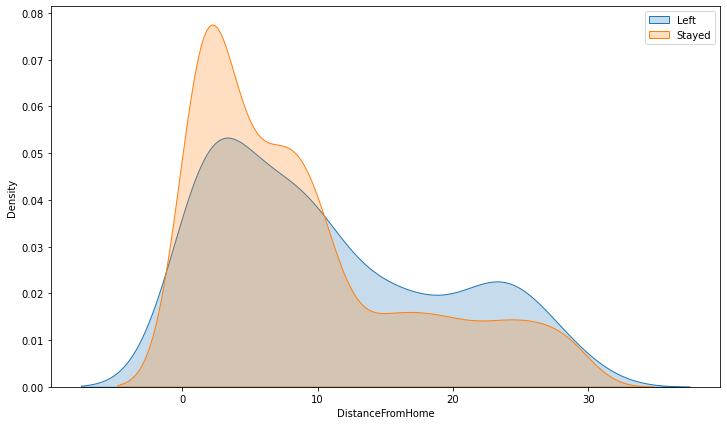

In [15]:
plt.figure(figsize=(12, 7))
sns.kdeplot(x="DistanceFromHome", data=left_df, shade=True, label="Left")
sns.kdeplot(x="DistanceFromHome", data=stayed_df, shade=True, label="Stayed")
plt.legend()

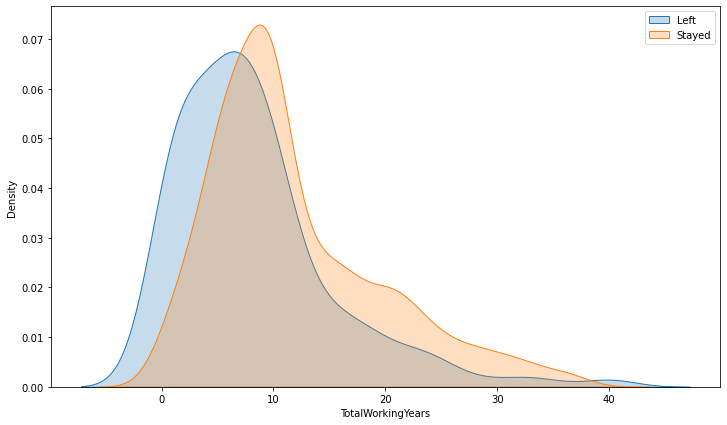

In [16]:
plt.figure(figsize=(12, 7))
sns.kdeplot(x="TotalWorkingYears", data=left_df, shade=True, label="Left")
sns.kdeplot(x="TotalWorkingYears", data=stayed_df, shade=True, label="Stayed")
plt.legend()

Pessoas que ficam na empresa, trabalharam mais anos durante sua vida

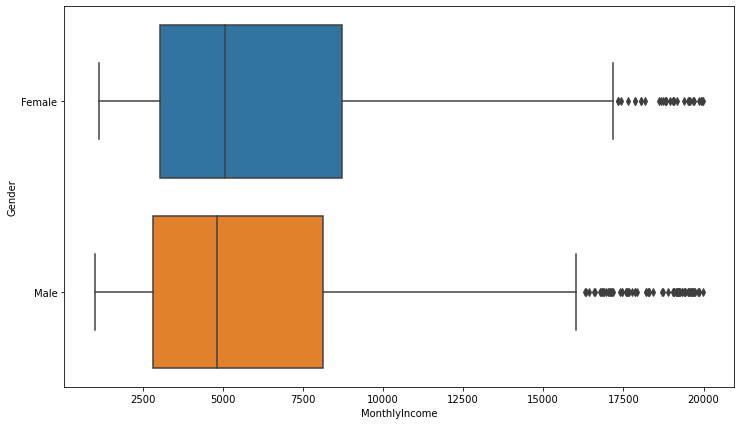

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="MonthlyIncome", y="Gender", data=employee_df);

Mulheres nessa empresa ganham mais, logo podem tender a sair menos

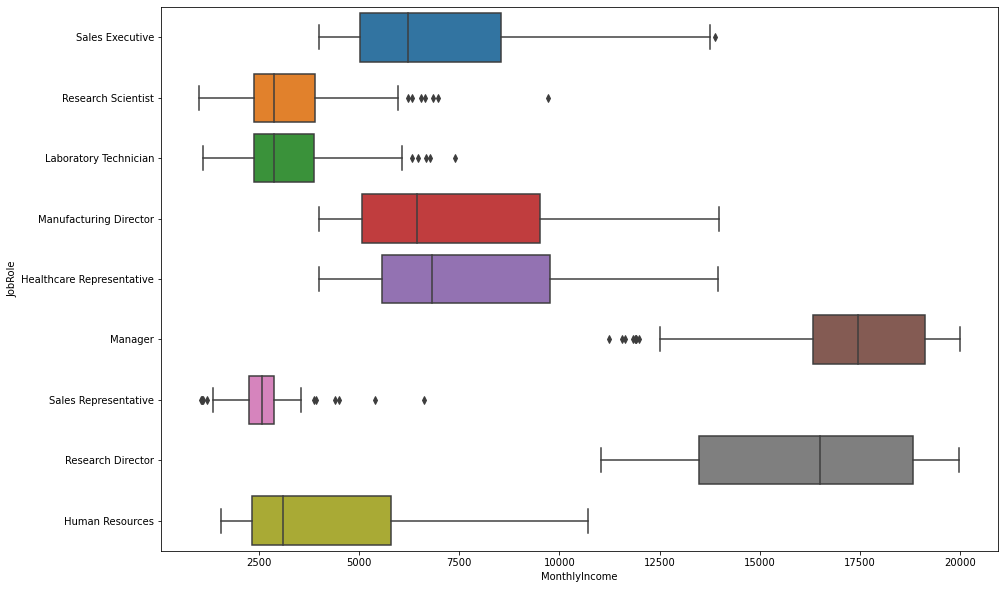

In [18]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="MonthlyIncome", y="JobRole", data=employee_df);

## Tratamento de dados

In [19]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### Transformação de atributos categoricos para numéricos

In [20]:
cat_columns = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"]
employee_df_cat = employee_df[cat_columns]

encoder = OneHotEncoder()
employee_df_cat = encoder.fit_transform(employee_df_cat).toarray()
employee_df_cat = pd.DataFrame(employee_df_cat)
employee_df_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [21]:
employee_df_mod = employee_df.drop(columns=cat_columns)
employee_df_mod = pd.concat([employee_df_mod, employee_df_cat], axis=1)
employee_df_mod

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,16,17,18,19,20,21,22,23,24,25
0,41,1,1102,1,2,2,94,3,2,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,279,8,1,3,61,2,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,2,4,92,2,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1392,3,4,4,56,3,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0,591,2,1,1,40,3,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,613,6,1,4,42,2,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,155,4,3,2,87,4,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,1023,2,3,4,63,2,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Normalização

In [22]:
scaler = preprocessing.MinMaxScaler()
df_scaled = scaler.fit_transform(employee_df_mod)
employee_df_mod = pd.DataFrame(df_scaled, columns=employee_df_mod.columns)
employee_df_mod

/home/daniel/miniconda3/envs/dissertacao/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/daniel/miniconda3/envs/dissertacao/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,16,17,18,19,20,21,22,23,24,25
0,0.547619,1.0,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.0,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,1.0,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.0,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.0,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.0,0.559771,0.785714,0.25,0.666667,0.157143,1.000000,0.25,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.500000,0.0,0.365784,0.178571,0.00,1.000000,0.171429,0.333333,0.50,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.214286,0.0,0.037938,0.107143,0.50,0.333333,0.814286,1.000000,0.25,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.738095,0.0,0.659270,0.035714,0.50,1.000000,0.471429,0.333333,0.25,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Treinamento
### Divisão dos dados em treino e teste

In [169]:
x = employee_df_mod.drop(columns=["Attrition"])
y = employee_df_mod[["Attrition"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, shuffle=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1323, 50), (147, 50), (1323, 1), (147, 1))

### Aplicação da Regressão Logística

In [170]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

y_pred = logistic.predict(x_test)
y_pred

/home/daniel/miniconda3/envs/dissertacao/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/daniel/miniconda3/envs/dissertacao/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/daniel/miniconda3/envs/dissertacao/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.])

#### Avaliação do modelo

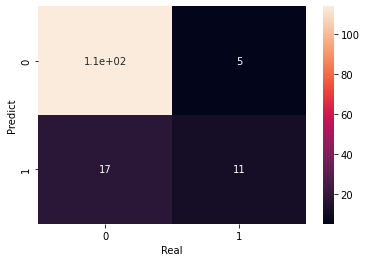

In [171]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel("Predict")
plt.xlabel("Real");

In [172]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8503401360544217


In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       119
         1.0       0.69      0.39      0.50        28

    accuracy                           0.85       147
   macro avg       0.78      0.68      0.71       147
weighted avg       0.84      0.85      0.83       147



Média do macro avg após 10 execuções separando o dado de forma aleatória: 0.723

### Aplicação do Random Forest

In [174]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)
y_pred

/home/daniel/miniconda3/envs/dissertacao/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/tmp/ipykernel_211/3128253877.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)
/home/daniel/miniconda3/envs/dissertacao/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Avaliação do modelo

In [175]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8163265306122449


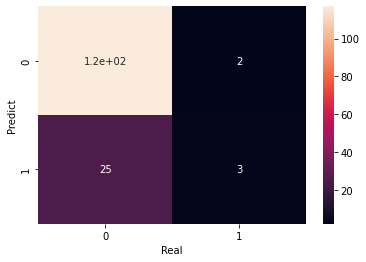

In [176]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel("Predict")
plt.xlabel("Real");

In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.98      0.90       119
         1.0       0.60      0.11      0.18        28

    accuracy                           0.82       147
   macro avg       0.71      0.55      0.54       147
weighted avg       0.78      0.82      0.76       147



Média do macro avg após 10 execuções separando o dado de forma aleatória: 0.591

### Aplicação da RNA

In [178]:
rna = models.Sequential()
rna.add(layers.Input(shape=x_train.shape[1]))
rna.add(layers.Dense(25, activation='relu'))
rna.add(layers.Dense(12, activation='relu'))
rna.add(layers.Dense(6, activation='relu'))
rna.add(layers.Dense(1, activation='sigmoid'))

rna.compile(optimizer="Adam", loss="binary_crossentropy", metrics="accuracy")
rna.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_37 (Dense)             (None, 12)                312       
_________________________________________________________________
dense_38 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 7         
Total params: 1,672
Trainable params: 1,672
Non-trainable params: 0
_________________________________________________________________


In [179]:
rna.fit(x_train, y_train, epochs=150)

Epoch 1/150
42/42 [==============================] - 0s 690us/step - loss: 0.6005 - accuracy: 0.7098
Epoch 2/150
42/42 [==============================] - 0s 690us/step - loss: 0.4279 - accuracy: 0.8420
Epoch 3/150
42/42 [==============================] - 0s 672us/step - loss: 0.4036 - accuracy: 0.8420
Epoch 4/150
42/42 [==============================] - 0s 662us/step - loss: 0.3862 - accuracy: 0.8428
Epoch 5/150
42/42 [==============================] - 0s 664us/step - loss: 0.3681 - accuracy: 0.8466
Epoch 6/150
42/42 [==============================] - 0s 655us/step - loss: 0.3508 - accuracy: 0.8541
Epoch 7/150
42/42 [==============================] - 0s 642us/step - loss: 0.3361 - accuracy: 0.8632
Epoch 8/150
42/42 [==============================] - 0s 652us/step - loss: 0.3248 - accuracy: 0.8753
Epoch 9/150
42/42 [==============================] - 0s 641us/step - loss: 0.3148 - accuracy: 0.8798
Epoch 10/150
42/42 [==============================] - 0s 633us/step - loss: 0.3085 - accura

42/42 [==============================] - 0s 651us/step - loss: 0.1435 - accuracy: 0.9448
Epoch 82/150
42/42 [==============================] - 0s 739us/step - loss: 0.1358 - accuracy: 0.9516
Epoch 83/150
42/42 [==============================] - 0s 657us/step - loss: 0.1383 - accuracy: 0.9441
Epoch 84/150
42/42 [==============================] - 0s 654us/step - loss: 0.1307 - accuracy: 0.9501
Epoch 85/150
42/42 [==============================] - 0s 635us/step - loss: 0.1351 - accuracy: 0.9456
Epoch 86/150
42/42 [==============================] - 0s 645us/step - loss: 0.1322 - accuracy: 0.9524
Epoch 87/150
42/42 [==============================] - 0s 656us/step - loss: 0.1256 - accuracy: 0.9524
Epoch 88/150
42/42 [==============================] - 0s 671us/step - loss: 0.1264 - accuracy: 0.9509
Epoch 89/150
42/42 [==============================] - 0s 648us/step - loss: 0.1219 - accuracy: 0.9554
Epoch 90/150
42/42 [==============================] - 0s 629us/step - loss: 0.1207 - accuracy: 

In [180]:
y_pred = rna.predict(x_test)
y_pred = y_pred > 0.5
y_pred

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

#### Avaliação do modelo

In [181]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8299319727891157


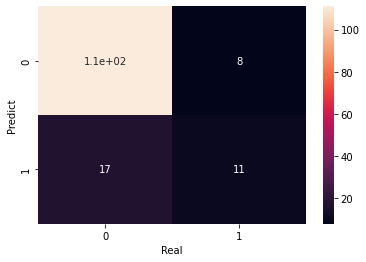

In [182]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel("Predict")
plt.xlabel("Real");

In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       119
         1.0       0.58      0.39      0.47        28

    accuracy                           0.83       147
   macro avg       0.72      0.66      0.68       147
weighted avg       0.81      0.83      0.82       147



Média do macro avg após 10 execuções separando o dado de forma aleatória: 0.665

## Salvando o melhor modelo classificador

In [187]:
f = open("./best_model_saved.pkl", "wb")
pickle.dump([logistic, encoder, scaler], f)

## Simulando o uso do modelo em produção
### Carga do modelo

In [188]:
f = open("./best_model_saved.pkl", "rb")
model, encoder, scaler = pickle.load(f)
model, encoder, scaler

(LogisticRegression(), OneHotEncoder(), MinMaxScaler())

Funcionário aleatório a ser analisado

In [189]:
new_x = employee_df.iloc[10:11]
new_x.reset_index(drop=True, inplace=True)
new_x

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35,0,Travel_Rarely,809,Research & Development,16,3,Medical,1,Male,...,3,3,1,6,5,3,5,4,0,3


### Transformando variáveis categóricas em numéricas

In [190]:
new_x_cat = new_x[cat_columns]
new_x_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [191]:
new_x_cat = encoder.transform(new_x_cat).toarray()
new_x_cat = pd.DataFrame(new_x_cat)
new_x_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [192]:
new_x = new_x.drop(columns=cat_columns)
new_x = pd.concat([new_x, new_x_cat], axis=1)
new_x

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,16,17,18,19,20,21,22,23,24,25
0,35,0,809,16,3,1,84,4,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Normalização

In [193]:
df_scaled = scaler.transform(new_x)
new_x = pd.DataFrame(df_scaled, columns=new_x.columns)
new_x

/home/daniel/miniconda3/envs/dissertacao/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,16,17,18,19,20,21,22,23,24,25
0,0.404762,0.0,0.506084,0.535714,0.5,0.0,0.771429,1.0,0.0,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Predição

In [194]:
x = new_x.drop(columns=["Attrition"])
y = new_x[["Attrition"]]

model.predict(x)

/home/daniel/miniconda3/envs/dissertacao/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([0.])

In [195]:
model.predict_proba(x)

/home/daniel/miniconda3/envs/dissertacao/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[0.95072536, 0.04927464]])

In [196]:
model.classes_

array([0., 1.])